## Linear Regression model to predict rating

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Read in the dataset
sf_df = pd.read_csv(Path('../Resources/Restaurants_reviews_SF.csv'), encoding = "ISO-8859-1")
sf_df.head()

,ID,Name,Image,Url,Review count,Category,Rating,Price,Latitude,Longitude,Address,City,State,Country,Phone,Review
0,HHtpR0RslupSQ99GIIwW5A,Marufuku Ramen,https://s3-media4.fl.yelpcdn.com/bphoto/ouK2Vm...,https://www.yelp.com/biz/marufuku-ramen-san-fr...,4122,Ramen,4.5,$$,37.785116,-122.432008,1581 Webster St,San Francisco,CA,US,(415) 872-9786,"['Long long overdue review, but I loved this p..."
1,f-m7-hyFzkf0HSEeQ2s-9A,Fog Harbor Fish House,https://s3-media2.fl.yelpcdn.com/bphoto/by8Hh6...,https://www.yelp.com/biz/fog-harbor-fish-house...,8324,Seafood,4.5,$$,37.808988,-122.410297,39 Pier,San Francisco,CA,US,(415) 969-2010,['Great food and not a long wait. Perfect on ...
2,XAYwAF_83becwNnSJDFkpA,Dumpling House,https://s3-media2.fl.yelpcdn.com/bphoto/DNfqq1...,https://www.yelp.com/biz/dumpling-house-san-fr...,360,Dim Sum,4.5,$$,37.763552,-122.432762,335 Noe St,San Francisco,CA,US,(415) 829-2789,"[""Love coming here - I've gotten so many of th..."
3,J7_-faNq_Ag9qTOlDn81Pw,Starbelly,https://s3-media2.fl.yelpcdn.com/bphoto/G1SweY...,https://www.yelp.com/biz/starbelly-san-francis...,2115,Comfort Food,4.0,$$,37.764020,-122.432530,3583 16th St,San Francisco,CA,US,(415) 252-7500,['Starbelly has been one of my go to comfort r...
4,QueFVMcMlT-6aZFv2M47mg,Bottega,https://s3-media2.fl.yelpcdn.com/bphoto/IawDcF...,https://www.yelp.com/biz/bottega-san-francisco...,379,Italian,4.5,$$,37.754720,-122.421200,1132 Valencia St,San Francisco,CA,US,(415) 655-9048,['What a great place to grab lunch/dinner with...


## Preprocess data

In [3]:
# View a list of all of the columns
sf_df.columns

Index(['ID', 'Name', 'Image', 'Url', 'Review count', 'Category', 'Rating',
       'Price', 'Latitude', 'Longitude', 'Address', 'City', 'State', 'Country',
       'Phone', 'Review'],
      dtype='object')

In [4]:
# Drop columns that are not relevant to the analysis / will confuse the model
sf_df = sf_df.drop(columns=[
    'ID',
    'Image',
    'Url',
    'Latitude',
    'Longitude',
    'Address', 
    'City',
    'State',
    'Country',
    'Phone'
])
sf_df.head()

,Name,Review count,Category,Rating,Price,Review
0,Marufuku Ramen,4122,Ramen,4.5,$$,"['Long long overdue review, but I loved this p..."
1,Fog Harbor Fish House,8324,Seafood,4.5,$$,['Great food and not a long wait. Perfect on ...
2,Dumpling House,360,Dim Sum,4.5,$$,"[""Love coming here - I've gotten so many of th..."
3,Starbelly,2115,Comfort Food,4.0,$$,['Starbelly has been one of my go to comfort r...
4,Bottega,379,Italian,4.5,$$,['What a great place to grab lunch/dinner with...


In [5]:
# Determine the number of unique values in each column.
sf_df.nunique()

Name            598
Review count    518
Category         99
Rating            5
Price             4
Review          585
dtype: int64

In [6]:
# Look at Category value counts for binning
cui_counts = sf_df.Category.value_counts()
print(cui_counts)

American (New)        45
Italian               40
Breakfast & Brunch    35
Japanese              32
Vietnamese            26
                      ..
Uzbek                  1
Halal                  1
Gluten-Free            1
Kebab                  1
Laotian                1
Name: Category, Length: 99, dtype: int64


In [7]:
# Value_counts the Price column for preprocessing
price_counts = sf_df.Price.value_counts()
print(price_counts)

$$      501
$$$      67
$        35
$$$$     21
Name: Price, dtype: int64


In [8]:
# Convert 'Price' column to numeric values
sf_df.loc[sf_df["Price"] == "$", "Price"] = 1
sf_df.loc[sf_df["Price"] == "$$", "Price"] = 2
sf_df.loc[sf_df["Price"] == "$$$", "Price"] = 3
sf_df.loc[sf_df["Price"] == "$$$$", "Price"] = 4
sf_df

,Name,Review count,Category,Rating,Price,Review
0,Marufuku Ramen,4122,Ramen,4.5,2,"['Long long overdue review, but I loved this p..."
1,Fog Harbor Fish House,8324,Seafood,4.5,2,['Great food and not a long wait. Perfect on ...
2,Dumpling House,360,Dim Sum,4.5,2,"[""Love coming here - I've gotten so many of th..."
3,Starbelly,2115,Comfort Food,4.0,2,['Starbelly has been one of my go to comfort r...
4,Bottega,379,Italian,4.5,2,['What a great place to grab lunch/dinner with...
...,...,...,...,...,...,...
619,LaoTable,1339,Laotian,4.0,2,NaN
620,Wooly Pig,777,Sandwiches,4.5,2,NaN
621,Boudin,4161,Bakeries,4.0,2,NaN
622,Tara Indian Cuisine,421,Indian,4.0,2,NaN


In [9]:
# Drop columns that are not relevant to the analysis / will confuse the model
sf_df = sf_df.drop(columns=['Name','Review'])
sf_df.head()

,Review count,Category,Rating,Price
0,4122,Ramen,4.5,2
1,8324,Seafood,4.5,2
2,360,Dim Sum,4.5,2
3,2115,Comfort Food,4.0,2
4,379,Italian,4.5,2


### Check for linearity among independent and dependent variables

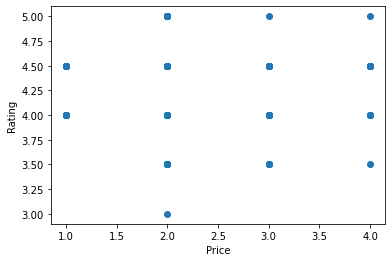

In [10]:
plt.scatter(sf_df['Price'], sf_df['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

### Define variables and Split the data into train and test sets

In [11]:
# Create our features
X = sf_df.drop(columns="Rating")
X = pd.get_dummies(X)


# Create our target
y = sf_df["Rating"]

In [12]:
# View summary statistics for 'X' (features)
X.describe()

,Review count,Category_American (New),Category_American (Traditional),Category_Arabic,Category_Asian Fusion,Category_Bakeries,Category_Barbeque,Category_Bars,Category_Brazilian,Category_Breakfast & Brunch,...,Category_Thai,Category_Ukrainian,Category_Uzbek,Category_Vegetarian,Category_Vietnamese,Category_Wine Bars,Price_1,Price_2,Price_3,Price_4
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.00000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.00000,624.000000,624.000000,624.000000
mean,993.354167,0.072115,0.022436,0.003205,0.009615,0.022436,0.004808,0.004808,0.003205,0.05609,...,0.017628,0.001603,0.001603,0.001603,0.041667,0.012821,0.05609,0.802885,0.107372,0.033654
std,1301.890077,0.258886,0.148215,0.056568,0.097664,0.148215,0.069226,0.069226,0.056568,0.23028,...,0.131701,0.040032,0.040032,0.040032,0.199987,0.112590,0.23028,0.398139,0.309834,0.180481
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,531.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,1340.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,11738.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [13]:
# Check the balance of our target values
y.value_counts()

4.0    344
4.5    232
3.5     30
5.0     17
3.0      1
Name: Rating, dtype: int64

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Create the model

In [15]:
# Create a model with scikit-learn
model = LinearRegression()

### Fit the model

In [16]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# The model creates predicted y values based on X values
y_pred = model.predict(X_test)
print(y_pred.shape)

(156,)


In [15]:
# # Plot the results. The best fit line is red.
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [18]:
# The slope
# The y-intercept

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-4.42088565e-05 -2.25184143e+07 -2.25184144e+07 -2.25184140e+07
 -2.25184141e+07 -2.25184142e+07 -2.25184147e+07 -2.25184144e+07
  1.02331461e+08 -2.25184143e+07 -2.25184149e+07 -2.25184138e+07
 -2.25184146e+07 -2.25184144e+07 -2.25184143e+07 -2.25184144e+07
 -2.25184146e+07 -2.25184144e+07 -2.25184142e+07 -2.25184142e+07
 -2.25184145e+07 -2.25184144e+07 -2.25184143e+07 -2.25184142e+07
 -2.25184142e+07 -2.25184145e+07 -2.25184145e+07 -3.22309130e+04
 -9.30750830e+03 -2.25184141e+07 -2.25184142e+07 -2.25184147e+07
 -6.10042638e+02 -2.25184142e+07 -2.25184142e+07 -2.25184144e+07
 -2.25184135e+07 -7.01813711e-01 -2.25184142e+07 -2.25184143e+07
 -2.25184140e+07 -2.25184142e+07 -2.25184144e+07 -2.25184143e+07
  0.00000000e+00 -2.25184140e+07 -2.25184140e+07 -2.25184141e+07
 -2.25184140e+07 -2.25184146e+07  2.83106871e-15 -2.25184140e+07
 -2.25184143e+07 -2.25184142e+07 -2.25184142e+07 -2.25184144e+07
 -2.25184145e+07 -2.25184140e+07 -2.25184143e+07  2.22044605e-16
 -2.2518414

In [19]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  242084052013633.12
mean_absolute_error :  3476904.0032231044


### Build the multiple linear regression equation as follows:

In [ ]:
# Aggregate rating = (model.intercept_) + 
                    # (model.coef_[0])*X1 + 
                    # (model.coef_[1])*X2 + 
                    # (model.coef_[2])*X3 + 
                    # (model.coef_[3])*X4 + 
                    # (model.coef_[4])*X5 + 
                    # (model.coef_[5])*X6